# ĐỒ ÁN CUỐI KỲ
## Nhóm 07

### Thành viên
1. Lưu Hữu Tình - 21424056
2. Đặng Hồ Hoàng Duy - 21424073
3. Huỳnh Văn Thái - 21424088

<h1>
<font color="blue">Chủ đề: THU THẬP DỮ LIỆU THÔNG TIN CÁC ĐỘI BÓNG</font>
</h1>

# PHẦN 1: QUY TRÌNH KHOA HỌC DỮ LIỆU

## A. Thu thập dữ liệu (Data collection)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<b>Import</b>

Cài đặt các thư viện, gói cho việc collect data


In [2]:
!pip install scrapy
!pip install spider3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.9/272.9 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 9.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import json
import re
import pandas as pd
import scrapy
from pandas.testing import assert_frame_equal
import datetime
import matplotlib.pyplot as plt


Bóng đá là môn thể thao hấp dẫn nhất hành tinh. Chúng ta sẽ khởi động môn học bằng việc thu thập dữ liệu của các CLB bóng đá. SoFIFA (https://sofifa.com/) là một trang web lưu trữ dữ liệu của các CLB trong trò chơi bóng đá nổi tiếng FIFA 23 mà có các chỉ số phản ánh gần đúng với phong độ của các CLB bóng đá ngoài đời. Trong phần này, nhiệm vụ đầu tiên là cần thu thập ID của các CLB.

#### Tạo một project mới với scrapy

Để sử dụng thư viện scrapy sau khi cài đặt xong, gọi câu lệnh như bên dưới để bắt đầu tạo một project mới với scrapy với tên gọi là `"fifa_crawler"`.

In [4]:
!scrapy startproject fifa_crawler

New Scrapy project 'fifa_crawler', using template directory '/usr/local/lib/python3.9/dist-packages/scrapy/templates/project', created in:
    /content/fifa_crawler

You can start your first spider with:
    cd fifa_crawler
    scrapy genspider example example.com


In [5]:
cd fifa_crawler/fifa_crawler

/content/fifa_crawler/fifa_crawler


Sau khi tạo xong project với scrapy, vì thu thập dữ liệu với thư viện này không cho phép xài notebook trực tiếp nên các bạn sau khi hoàn thành xong class `collect_team_url` (scrapy.Spider) ở bên dưới, tạo một file có tên `collect_teams_urls.py` vào đường dẫn sau `fifa_crawler/fifa_crawler/spiders/collect_teams_urls.py`.

<b>Tạo file collect_teams_urls.py</b>

1. File sẽ collect data từ trang https://sofifa.com/teams?col=oa&sort=desc&offset=0
2. Cấu trúc trả về là json, danh sách các url của mỗi đội bóng
```json
[
{"team_url": "/team/10"},
{"team_url": "/team/21"},
...
]
```

In [ ]:
# File: \fifa_crawler\fifa_crawler\spiders\collect_teams_urls.py
import scrapy

class collect_team_url(scrapy.Spider):
  name='teams_urls' 
  
  def start_requests(self):
    urls = ['https://sofifa.com/teams?col=oa&sort=desc&offset=0']
    
    # YOUR CODE HERE
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

    for i in range(1,13):
        url = f'https://sofifa.com/teams?col=oa&sort=desc&offset={i*60}' 
        urls.append(url)

    for url in urls:
      yield scrapy.Request(url=url, headers=headers, callback=self.parse)

  def parse(self, response):
    team_urls = response.css('td.col-name-wide a::attr(href)').extract()
    team_ids = []
    for url in team_urls:
      if url.split('/')[1] == "team":
        team_id = url.split('/')[2]
        team_url = f"/team/{team_id}"
        team_item = {"team_url": team_url}
        yield team_item

: 

<b>Start collect data từ file collect_teams_urls.py</b>

Data collect được lưu vào dataset/teams_urls.json

In [7]:
!rm /content/fifa_crawler/fifa_crawler/dataset/teams_urls.json
!scrapy crawl teams_urls -o dataset/teams_urls.json

rm: cannot remove '/content/fifa_crawler/fifa_crawler/dataset/teams_urls.json': No such file or directory
2023-04-18 09:46:01 [scrapy.utils.log] INFO: Scrapy 2.8.0 started (bot: fifa_crawler)
2023-04-18 09:46:01 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.9.16 (main, Dec  7 2022, 01:11:51) - [GCC 9.4.0], pyOpenSSL 23.1.1 (OpenSSL 3.1.0 14 Mar 2023), cryptography 40.0.1, Platform Linux-5.10.147+-x86_64-with-glibc2.31
2023-04-18 09:46:01 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'fifa_crawler',
 'FEED_EXPORT_ENCODING': 'utf-8',
 'NEWSPIDER_MODULE': 'fifa_crawler.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['fifa_crawler.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'}
2023-04-18 09:46:01 [asyncio] DEBUG: Using selector: EpollSelector
2023-04-18 09:46:01 [scrapy.utils.log] DEBUG: Using re

Sau khi đã có danh sách 712 ID của các CLB đã thu thập từ trang web SoFIFA, bạn sẽ tiến hành thu thập dữ liệu cụ thể của từng CLB ứng với các ID này bằng cách hoàn thành class `collect_team_info`(scrapy.Spider) như bên dưới.

<b>Tạo file collect_teams_info.py</b>

1. Thu thập thông tin chi tiết của mỗi đội bóng
2. Trả về data dạng json
```json
[
{
    "Name": "Chelsea", 
    "League": "[England] Premier League", 
    "Overall": "83", 
    "Attack": "83", 
    "Midfield": "81", 
    "Defence": "82", 
    "Home stadium": "Stamford Bridge", 
    "Rival team": "Arsenal", 
    "International prestige": "8", 
    "Domestic prestige": "9", 
    "Club worth": "\n", 
    "Starting XI average age": "24.55", 
    "Whole team average age": "24.39", 
    "Captain": "R. James", 
    "Short free kick": "R. James", 
    "Long free kick": "E. Fernández", 
    "Left short free kick": "João Félix", 
    "Right short free kick": "R. James", 
    "Penalties": "K. Havertz", 
    "Left corner": "B. Chilwell", 
    "Right corner": "R. James"
},
    ...
]
```

In [8]:
# \fifa_crawler\fifa_crawler\spiders\collect_teams_info.py
import scrapy
import json
import re
import datetime

class collect_team_info(scrapy.Spider):
  name='teams_info'
  
  def __init__(self):
    try:
      with open('dataset/teams_urls.json') as f:
        self.teams = json.load(f)
      self.team_count = 1
    except IOError:
      print("File not found")

  def start_requests(self):
    # YOUR CODE HERE
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    
    for team in self.teams:
      url = 'https://sofifa.com' + team['team_url'] + '?units=mks'
      yield scrapy.Request(url=url, headers=headers, callback=self.parse)
  
  def parse(self, response):
      # YOUR CODE HERE
      team_info = {}

      team_info["Name"] = response.css('div.info h1::text').get();

      team_info["League"] = response.css('div.meta.ellipsis a::text').get()

      ratings = response.css('section.card .bp3-tag.p::text').getall()

      team_info["Overall"] = ratings[0]

      team_info["Attack"] = ratings[1]
      
      team_info["Midfield"] = ratings[2]
      
      team_info["Defence"] = ratings[3]

      team_info["Home stadium"] = response.css('ul.pl li.ellipsis:contains("Home stadium")::text').get()
      
      team_info["Rival team"] = response.css('ul.pl li:contains("Rival team") a::text').get()

      team_info["International prestige"] = response.css('ul.pl li:contains("International prestige") span::text').get()

      team_info["Domestic prestige"] = response.css('ul.pl li:contains("Domestic prestige") span::text').get()

      team_info["Club worth"] =response.xpath('//li[contains(label, "Club worth")]/text()').re_first(r'€([\d\.]+)M')

      team_info["Starting XI average age"] = response.css('ul.pl li:contains("Starting XI average age")::text').get()

      team_info["Whole team average age"] = response.css('ul.pl li:contains("Whole team average age")::text').get()

      team_info["Captain"] = response.css('ul.pl li:contains("Captain") a::text').get()

      team_info["Short free kick"] = response.css('ul.pl li:contains("Short free kick") a::text').get()

      team_info["Long free kick"] = response.css('ul.pl li:contains("Long free kick") a::text').get()

      team_info["Left short free kick"] = response.css('ul.pl li:contains("Left short free kick") a::text').get()
      
      team_info["Right short free kick"] = response.css('ul.pl li:contains("Right short free kick") a::text').get()
      
      team_info["Penalties"] = response.css('ul.pl li:contains("Penalties") a::text').get()
      
      team_info["Left corner"] = response.css('ul.pl li:contains("Left corner") a::text').get()
      
      team_info["Right corner"] = response.css('ul.pl li:contains("Right corner") a::text').get()

      yield team_info

Sau khi đã hoàn thành class ở trên và lưu lại trong file `collect_teams_info.py`, các bạn sẽ tiếp tục chạy câu lệnh bên dưới để thu thập thông tin chi tiết của toàn bộ 712 CLB và xuất ra file `teams_info.json` ở cùng đường dẫn dataset như trên.

<b>Start collect data từ file collect_teams_info.py</b>

Data collect được lưu vào dataset/teams_info.json

In [9]:
!rm /content/fifa_crawler/fifa_crawler/dataset/teams_info.json
!scrapy crawl teams_info -o dataset/teams_info.json

rm: cannot remove '/content/fifa_crawler/fifa_crawler/dataset/teams_info.json': No such file or directory
2023-04-18 09:46:25 [scrapy.utils.log] INFO: Scrapy 2.8.0 started (bot: fifa_crawler)
2023-04-18 09:46:25 [scrapy.utils.log] INFO: Versions: lxml 4.9.2.0, libxml2 2.9.14, cssselect 1.2.0, parsel 1.7.0, w3lib 2.1.1, Twisted 22.10.0, Python 3.9.16 (main, Dec  7 2022, 01:11:51) - [GCC 9.4.0], pyOpenSSL 23.1.1 (OpenSSL 3.1.0 14 Mar 2023), cryptography 40.0.1, Platform Linux-5.10.147+-x86_64-with-glibc2.31
2023-04-18 09:46:25 [scrapy.crawler] INFO: Overridden settings:
{'BOT_NAME': 'fifa_crawler',
 'FEED_EXPORT_ENCODING': 'utf-8',
 'NEWSPIDER_MODULE': 'fifa_crawler.spiders',
 'REQUEST_FINGERPRINTER_IMPLEMENTATION': '2.7',
 'ROBOTSTXT_OBEY': True,
 'SPIDER_MODULES': ['fifa_crawler.spiders'],
 'TWISTED_REACTOR': 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'}
2023-04-18 09:46:25 [asyncio] DEBUG: Using selector: EpollSelector
2023-04-18 09:46:25 [scrapy.utils.log] DEBUG: Using re

<b>Đọc thông tin collect được lưu vào biến df</b>

In [ ]:
df = pd.read_json('/content/fifa_crawler/fifa_crawler/dataset/teams_info.json', encoding='utf-8-sig')
df.tail()

: 

## B. Khám phá dữ liệu (thường đan xen với tiền xử lý dữ liệu)

1. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

* Mỗi dòng trong bảng này tương ứng với thông tin về một đội bóng. Các dòng có ý nghĩa khác nhau và không có vấn đề gì về ý nghĩa của các dòng trong bảng.


2.Mỗi cột có ý nghĩa gì?

- Các cột trong dữ liệu này có ý nghĩa như sau:

```
Name: Tên đội bóng.
League: Tên giải đấu mà đội bóng đang tham gia.
Overall: Điểm số tổng thể của đội bóng.
Attack: Điểm số tấn công của đội bóng.
Midfield: Điểm số tiền vệ của đội bóng.
Defence: Điểm số phòng thủ của đội bóng.
Home stadium: Sân nhà của đội bóng.
Rival team: Đối thủ chính của đội bóng.
International prestige: Độ uy tín của đội bóng trong các giải đấu quốc tế (từ 1 đến 10).
Domestic prestige: Độ uy tín của đội bóng trong các giải đấu trong nước (từ 1 đến 10).
Transfer budget: Ngân sách chuyển nhượng của đội bóng.
Starting XI average age: Tuổi trung bình của đội hình xuất phát.
Whole team average age: Tuổi trung bình của toàn đội bóng.
Captain: Tên cầu thủ đội trưởng của đội bóng.
Short free kick: Cầu thủ thực hiện đá phạt ngắn.
Long free kick: Cầu thủ thực hiện đá phạt dài.
Left short free kick: Cầu thủ thực hiện đá phạt ngắn bên trái.
Right short free kick: Cầu thủ thực hiện đá phạt ngắn bên phải.
Penalties: Cầu thủ thực hiện đá phạt đền.
Left corner: Cầu thủ thực hiện đá phạt góc bên trái.
Right corner: Cầu thủ thực hiện đá phạt góc bên phải.
```

3. Mỗi cột hiện đang có kiểu dữ liệu gì? Khoảng biểu diễn của kiểu dữ liệu đó ra sao?
Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp hay không?

* Sau khi tạo DataFrame, chúng ta có thể sử dụng phương thức info() để xem thông tin tổng quan về dữ liệu:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     137 non-null    object 
 1   League                   137 non-null    object 
 2   Overall                  137 non-null    int64  
 3   Attack                   137 non-null    int64  
 4   Midfield                 137 non-null    int64  
 5   Defence                  137 non-null    int64  
 6   Home stadium             129 non-null    object 
 7   Rival team               137 non-null    object 
 8   International prestige   137 non-null    int64  
 9   Domestic prestige        127 non-null    float64
 10  Club worth               127 non-null    object 
 11  Starting XI average age  137 non-null    float64
 12  Whole team average age   137 non-null    float64
 13  Captain                  137 non-null    object 
 14  Short free kick          1

Qua đó ta có thể thấy:

* Dữ liệu có 712 dòng và 21 cột.

* Các cột chứa các kiểu dữ liệu khác nhau: int64, float64, và object...

<b>Kết luận:</b> Các một số cột có kiểu dữ liệu không phù hợp để xử lý tiếp. Tuy nhiên, có thể cần chuyển đổi kiểu dữ liệu của một số cột để phù hợp hơn với các phép tính và xử lý dữ liệu, ví dụ như chuyển đổi kiểu dữ liệu của cột "Transfer budget" từ chuỗi sang số thực.

In [12]:
# Chuyển kiểu dữ liệu của các cột số thành kiểu số liên tục
df['Domestic prestige'] = pd.to_numeric(df['Domestic prestige'], errors='coerce')
df['Club worth'] = pd.to_numeric(df['Club worth'], errors='coerce')
df['Starting XI average age'] = pd.to_numeric(df['Starting XI average age'], errors='coerce')
df['Whole team average age'] = pd.to_numeric(df['Whole team average age'], errors='coerce')


* Với mỗi cột, dữ liệu phân bố như thế nào? Để phân tích phân bố dữ liệu của từng cột, ta cần biểu diễn các giá trị trong cột dưới dạng biểu đồ phù hợp. Một số cách để thực hiện phân tích phân bố dữ liệu bao gồm sử dụng biểu đồ tần suất (histogram), biểu đồ hộp (box plot), hoặc biểu đồ phân phối xác suất (probability plot)... Ta cần chuyển đổi kiểu dữ liệu của các cột chứa dữ liệu số (int64 hoặc float64) sang kiểu dữ liệu số liên tục, sau đó sử dụng thư viện matplotlib để vẽ histogram. Với các cột chứa dữ liệu không phải số, ta có thể dùng biểu đồ bar chart để biểu diễn.

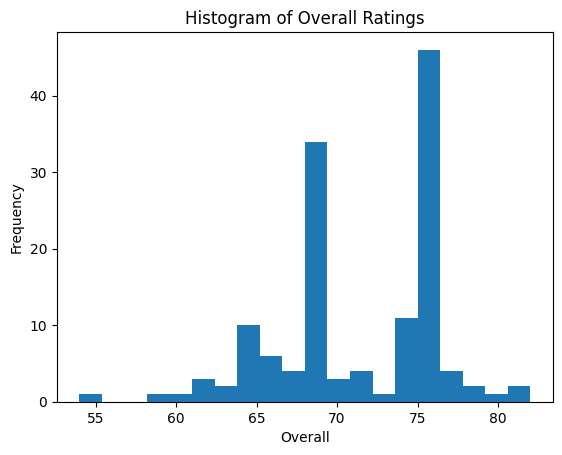

In [ ]:
# Vẽ histogram cho các cột số
# df.hist(column=['Overall', 'Attack', 'Midfield', 'Defence', 'International prestige', 
#                 'Domestic prestige', 'Club worth', 'Starting XI average age', 'Whole team average age'], bins=20)

# plot histogram
plt.hist(df['Overall'], bins=20)

# add labels and title
plt.xlabel('Overall')
plt.ylabel('Frequency')
plt.title('Histogram of Overall Ratings')

# show plot
plt.show()


* Nhận xét: Đa số đội bóng có điểm tổng thể là 76-77 điểm (chiếm 47%), 67-68 điểm (chiếm 35%). Tỉ lệ đội bóng có điểm tổng thể lớn hơn 80 rất thấp, chiếm khoảng 2-3%

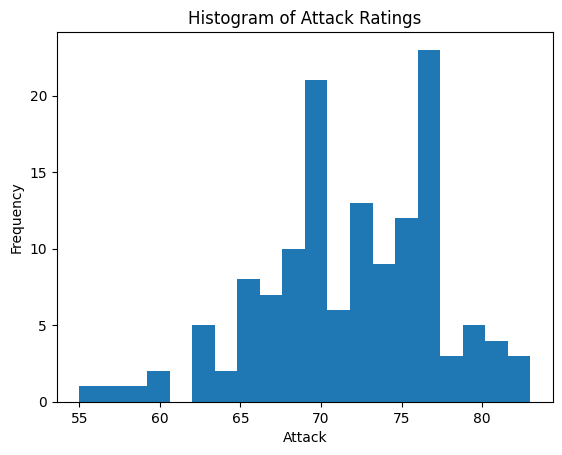

In [ ]:
# plot histogram
plt.hist(df['Attack'], bins=20)

# add labels and title
plt.xlabel('Attack')
plt.ylabel('Frequency')
plt.title('Histogram of Attack Ratings')

# show plot
plt.show()

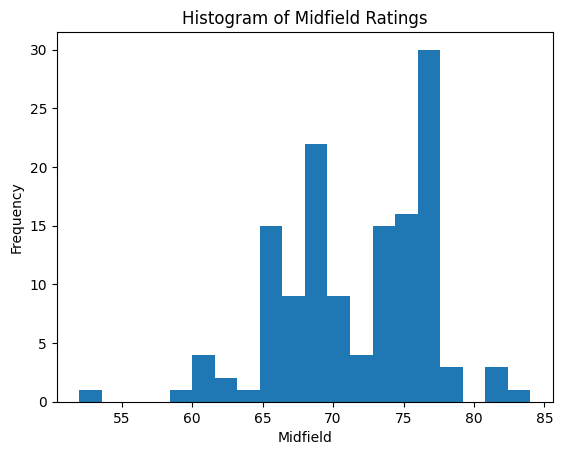

In [ ]:
# plot histogram
plt.hist(df['Midfield'], bins=20)

# add labels and title
plt.xlabel('Midfield')
plt.ylabel('Frequency')
plt.title('Histogram of Midfield Ratings')

# show plot
plt.show()

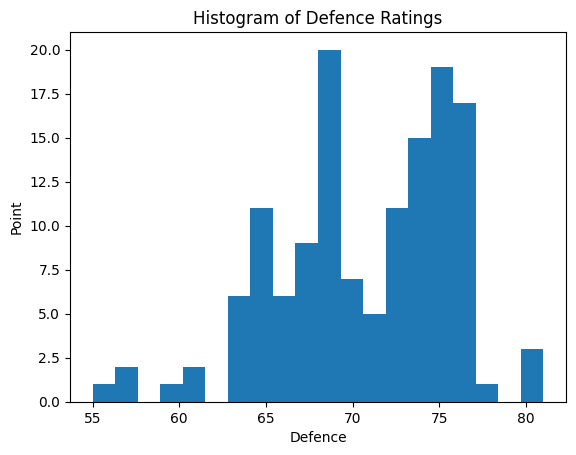

In [ ]:
# plot histogram
plt.hist(df['Defence'], bins=20)

# add labels and title
plt.xlabel('Defence')
plt.ylabel('Point')
plt.title('Histogram of Defence Ratings')

# show plot
plt.show()

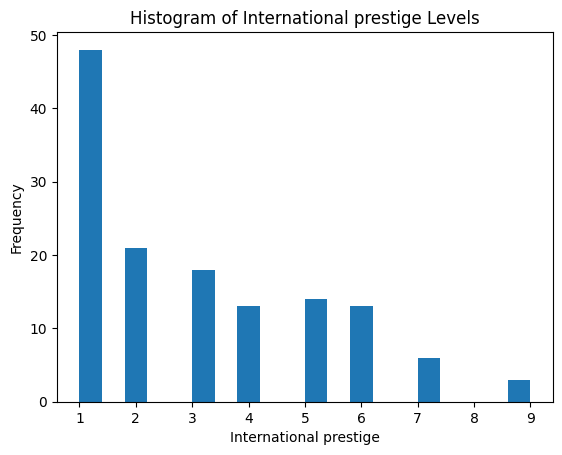

In [ ]:
# plot histogram
plt.hist(df['International prestige'], bins=20)

# add labels and title
plt.xlabel('International prestige')
plt.ylabel('Frequency')
plt.title('Histogram of International prestige Levels')

# show plot
plt.show()

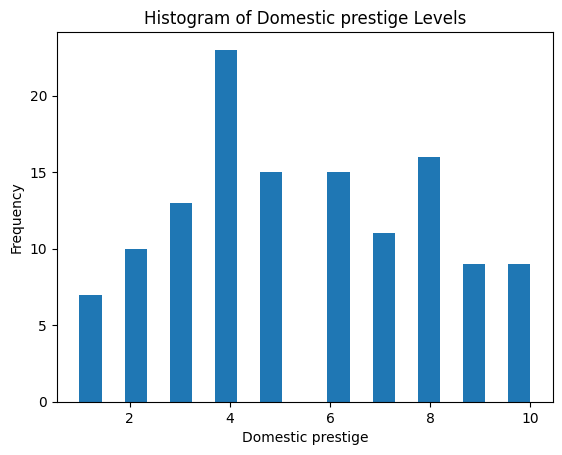

In [ ]:
# plot histogram
plt.hist(df['Domestic prestige'], bins=20)

# add labels and title
plt.xlabel('Domestic prestige')
plt.ylabel('Frequency')
plt.title('Histogram of Domestic prestige Levels')

# show plot
plt.show()

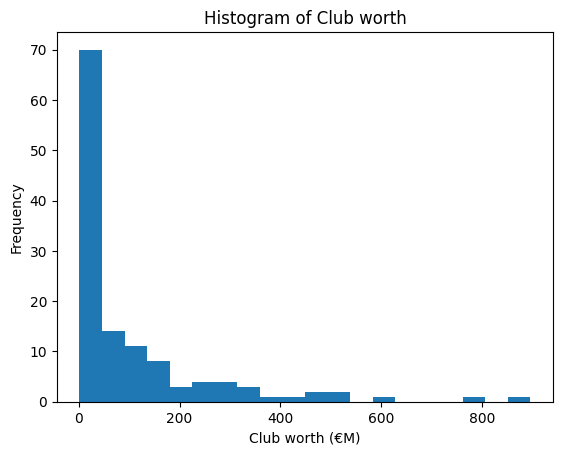

In [ ]:
# plot histogram
plt.hist(df['Club worth'], bins=20)

# add labels and title
plt.xlabel('Club worth (€M)')
plt.ylabel('Frequency')
plt.title('Histogram of Club worth')

# show plot
plt.show()

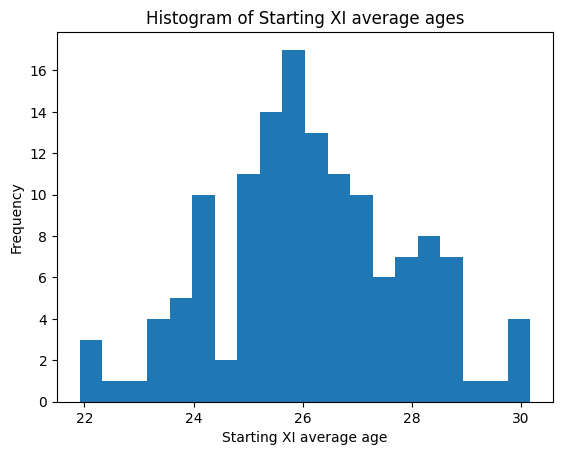

In [ ]:
# plot histogram
plt.hist(df['Starting XI average age'], bins=20)

# add labels and title
plt.xlabel('Starting XI average age')
plt.ylabel('Frequency')
plt.title('Histogram of Starting XI average ages')

# show plot
plt.show()

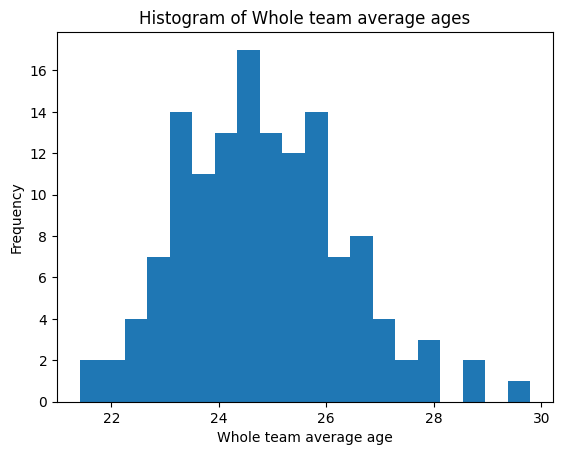

In [ ]:
# plot histogram
plt.hist(df['Whole team average age'], bins=20)

# add labels and title
plt.xlabel('Whole team average age')
plt.ylabel('Frequency')
plt.title('Histogram of Whole team average ages')

# show plot
plt.show()



Ví dụ về cách vẽ biểu đồ bar chart cho các cột không phải số của dataframe:



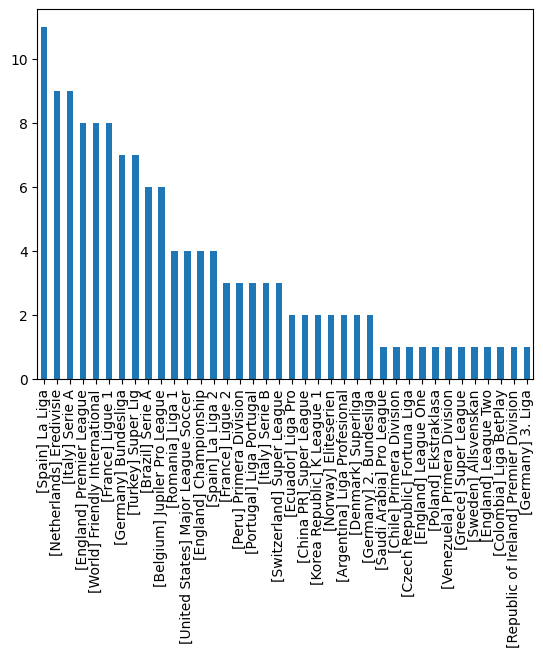

In [ ]:
# Vẽ biểu đồ bar chart cho cột League
df['League'].value_counts().plot(kind='bar')
plt.show()


* Nhận xét: Trong 100 đội bóng thì có 11 đội bóng tham gia giải Spain Laliga

## C. Đặt các câu hỏi có ý nghĩa cần trả lời

### 5 câu hỏi mà nhóm trả lời bằng dữ liệu nêu trên:

1. Đội bóng này thuộc hạng mục nào trong bảng xếp hạng FIFA? (Uy tín quốc tế và uy tín trong nước)

* Ý nghĩa: Câu hỏi này giúp người dùng biết được đội bóng đang đứng ở vị trí nào trong bảng xếp hạng FIFA, giúp đánh giá cường độ của đội bóng đó trên sân đấu và so sánh với các đội bóng khác.

2. Cầu thủ nào được ưu tiên sử dụng để đá phạt ngắn, đá phạt dài, đá phạt ngắn bên trái, đá phạt ngắn bên phải, góc trái và góc phải?

* Ý nghĩa: Câu hỏi này giúp người dùng biết được những cầu thủ được ưa chuộng để thực hiện các tình huống đá phạt và góc, từ đó giúp người dùng phân tích chiến thuật và cách chơi của đội bóng.

3. Đội trưởng của đội bóng là ai?

* Ý nghĩa: Câu hỏi này giúp người dùng biết được cầu thủ nào đảm nhận vai trò lãnh đạo đội bóng và có tầm ảnh hưởng như thế nào đến đội bóng, từ đó giúp người dùng đánh giá khả năng lãnh đạo và ảnh hưởng của cầu thủ đó đến đội bóng.

4. Tuổi trung bình của đội bóng là bao nhiêu?

* Ý nghĩa: Câu hỏi này giúp người dùng biết được đội bóng có độ tuổi trung bình cao hay thấp, từ đó giúp đánh giá khả năng thi đấu của đội bóng trong thời gian dài và đánh giá cường độ của đội bóng.

5. Sân vận động của đội bóng là gì?

* Ý nghĩa: Câu hỏi này giúp người dùng biết được sân vận động mà đội bóng đang sử dụng để thi đấu, từ đó giúp người dùng nắm được thông tin cơ bản về sân nhà của đội bóng và có thể dự đoán được cách thi đấu của đội bóng trên sân nhà.

6. Độ tuổi trung bình của cầu thủ là bao nhiêu?
* Ý nghĩa: Xác định 1 cầu thủ tham gia thi đấu sẽ có độ tuổi trong khoảng nào.


<b>Nguồn cảm hứng của câu hỏi:</b> Tham khảo các thông tin liên quan đến đội bóng và từ đó đặt ra các câu hỏi liên quan đến thông tin đó. Ngoài ra, còn sử dụng kinh nghiệm, kiến thức của mình để đưa ra các câu hỏi phù hợp với đề tài.

# PHẦN 2: MÔ HÌNH HÓA DỮ LIỆU

### A. Mô hình hóa dữ liệu và đánh giá mô hình

##### Phân loại đội bóng (uy tín, không uy tín) dựa trên các đặc trưng của đội bóng như (Overall, International prestige, Domestic prestige) sử dụng thuật toán phân loại Random Forest

Để giải quyết bài toán này, chúng ta sẽ thực hiện các bước sau:

1. Khám phá và tiền xử lý dữ liệu.
2. Tạo tập huấn luyện và tập kiểm tra.
3. Huấn luyện mô hình phân loại Random Forest.
4. Đánh giá mô hình.

**Bước 1: Khám phá và tiền xử lý dữ liệu**

* Kiểm tra các cột thiếu dữ liệu

In [19]:
print(df.isna().sum())


Name                         0
League                       0
Overall                      0
Attack                       0
Midfield                     0
Defence                      0
Home stadium                 8
Rival team                   0
International prestige       0
Domestic prestige           10
Club worth                 137
Starting XI average age      0
Whole team average age       0
Captain                      0
Short free kick              0
Long free kick               0
Left short free kick         0
Right short free kick        0
Penalties                    0
Left corner                  0
Right corner                 0
dtype: int64


* Xóa các dòng dữ liệu NaN ở cột Domestic prestige

In [20]:
df.dropna(subset=['Domestic prestige'], inplace=True)

**Bước 2: Tạo tập huấn luyện và tập kiểm tra**

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

* Chọn các đặc trưng để sử dụng cho mô hình phân loại

In [32]:
features = ['Overall', 'International prestige', 'Domestic prestige']
X = df[features]

* Tạo nhãn dựa trên điều kiện uy tín (ví dụ: Overall >= 75 và (International prestige >= 6 hoặc Domestic prestige>= 6))

In [33]:
y = (df['Overall'] >= 70) & ((df['International prestige'] >= 5) | (df['Domestic prestige'] >= 5))

* Chia dữ liệu thành tập huấn luyện và tập kiểm tra

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Bước 3: Huấn luyện mô hình phân loại Random Forest**

* Tạo mô hình Random Forest với 100 cây quyết định

In [35]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

* Huấn luyện mô hình với dữ liệu huấn luyện

In [36]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Bước 4: Đánh giá mô hình**

* Dự đoán nhãn cho tập kiểm tra

In [37]:
y_pred = clf.predict(X_test)

* Tính độ chính xác của mô hình

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác:", accuracy)

Độ chính xác: 1.0


* Tính bảng phân loại

In [39]:
report = classification_report(y_test, y_pred)
print("Bảng phân loại:\n", report)

Bảng phân loại:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00        24
        True       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



* Tính ma trận nhầm lẫn

In [40]:
cm = confusion_matrix(y_test, y_pred)
print("Ma trận nhầm lẫn:\n", cm)

Ma trận nhầm lẫn:
 [[24  0]
 [ 0  2]]


Sau khi thực hiện các bước trên, bạn sẽ có được kết quả đánh giá mô hình phân loại đội bóng (uy tín, không uy tín) sử dụng thuật toán Random Forest.